# Machine Learning 4 Construction. Data Exploration

This is a data exploration of Iris Dataset.
#### Main steps:
 1. To check datashape description
 2. To check data completeness
 3. To check data balance
 4. To buld some visualization to understand data structure


In [61]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import decomposition

### 1 To check datashape description
Here we load dataset and convert it into pandas DataFrame

In [64]:
iris_data = load_iris()
iris_data
 # convert data to Pandas DataFrame
iris_frame = pd.DataFrame(iris_data.data)

# Naming columns
iris_frame.columns = iris_data.feature_names

# Add Target column to DataFrame:
iris_frame['target'] = iris_data.target
iris_frame['name'] = iris_frame.target.apply(lambda x: iris_data.target_names[x])
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


Columns are named not convinient. Let's make some renaming

In [66]:
iris_frame = iris_frame.rename(columns ={'sepal length (cm)':'sepal_length',
                            'sepal width (cm)': 'sepal_width',
                            'petal length (cm)':'petal_length',
                            'petal width (cm)':'petal_width'})

In [67]:
iris_frame.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int32
name             object
dtype: object

iris_frame.shape

### 2. To check data completeness
Here we check whether there are some NAs or Empty values

In [69]:
iris_frame.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
name            0
dtype: int64

In [70]:
iris_frame.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
name            0
dtype: int64

###### Conclusion: data is full, no need any additional data mining

### 3. To check data balance
Here we check the number of examples in each class

In [72]:
iris_frame \
            .groupby('name') \
            .agg({'target':'count'}) \
            .rename(columns ={'target':'# of examples'})

,# of examples
name,
setosa,50
versicolor,50
virginica,50


###### Conclusion: data is balanced well

### 4. To buld some visualization to understand data structure
Corelation matrix shows us that the corelation between several feachers are high.
#### They are:
1. petal_length vs sepal_length
2. petal_with vs sepal_length
3. petal_length vs petal_with
All the rest feachers have low or not significant correlation.

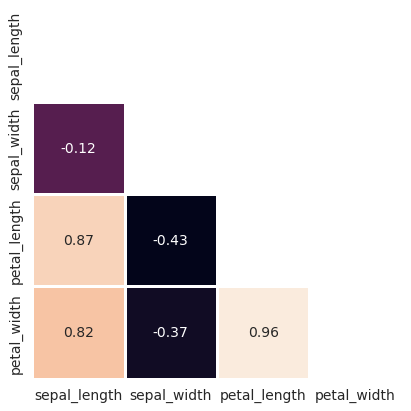

In [78]:
coef_cor = iris_frame[iris_frame.columns[0:-2]].corr()
mask = np.zeros_like(coef_cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(coef_cor, mask=mask, square=True, cbar=False, annot=True, linewidths=.9)

Here we build pair plot to vizualize, how features are distributed in space.
It is visible that one class "setosa" is separated from the rest two.


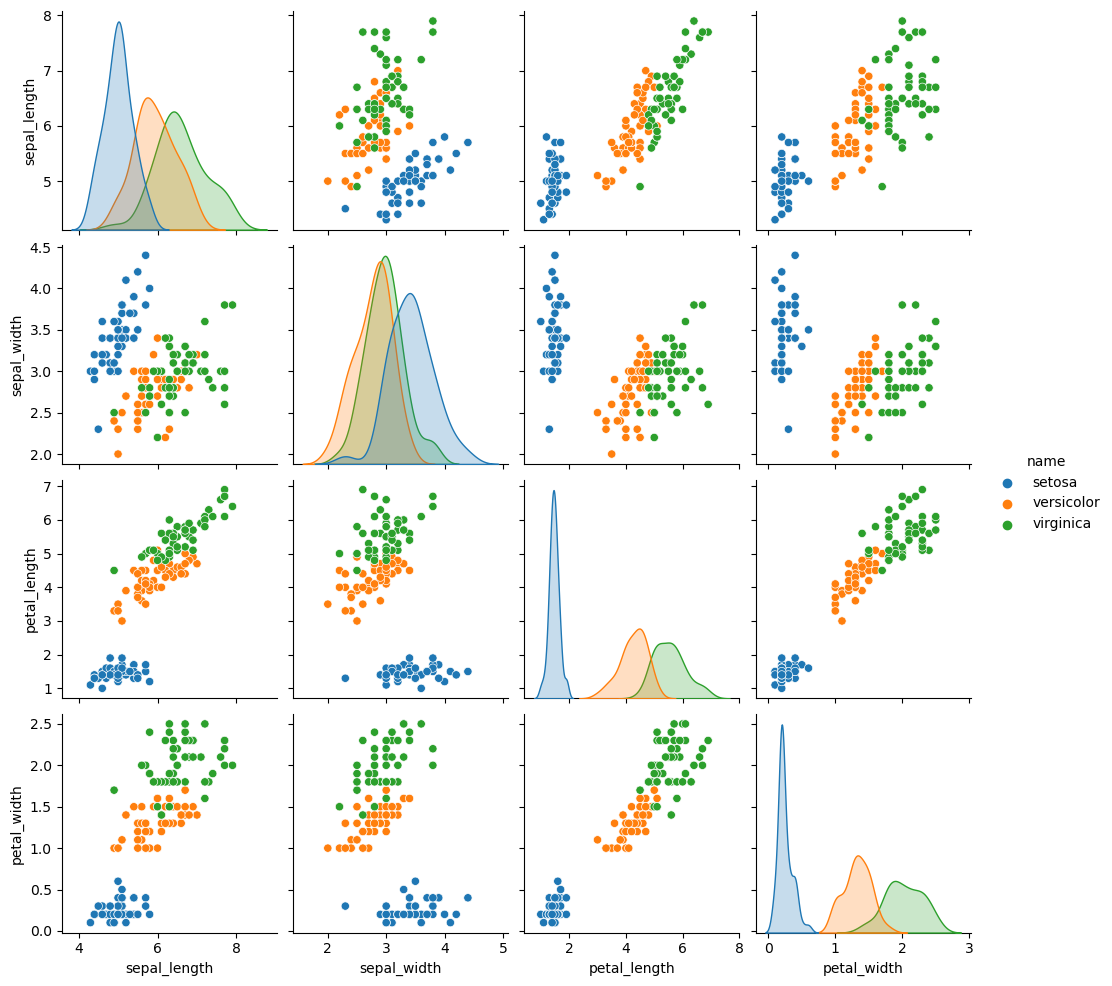

In [54]:
# pairplot:
sns.pairplot(iris_frame.drop(columns = ['target']), hue='name');

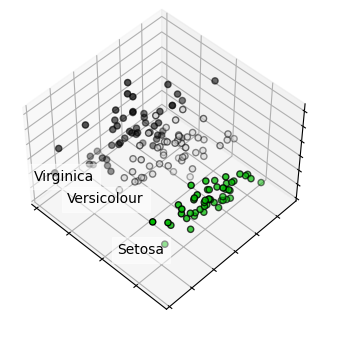

In [63]:
        np.random.seed(5)
        X = iris_frame.drop(columns = ['target', 'name'])
        y = iris_frame.target

        fig = plt.figure(1, figsize=(4, 3))
        plt.clf()

        ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
        ax.set_position([0, 0, 0.95, 1])

        plt.cla()
        pca = decomposition.PCA(n_components=3)
        pca.fit(X)
        X = pca.transform(X)

        for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
            ax.text3D(
                X[y == label, 0].mean(),
                X[y == label, 1].mean() + 1.5,
                X[y == label, 2].mean(),
                name,
                horizontalalignment="center",
                bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
            )
        # Reorder the labels to have colors matching the cluster results
        y = np.choose(y, [1, 2, 0]).astype(float)
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.zaxis.set_ticklabels([])

        plt.show()